In [85]:
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split

In [86]:
import warnings
import os

In [87]:
data_file_name = os.listdir('./data')[0]
dir_path = os.getcwd()
data_path = dir_path + '/data/' + data_file_name

In [88]:
raw_data = pd.read_csv(data_path)
raw_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [89]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [90]:
"""
    date time year-month-day hour:minute:second
    Appliances, energy use in Wh
    lights, energy use of light fixtures in the house in Wh
    T1, Temperature in kitchen area, in Celsius
    RH_1, Humidity in kitchen area, in %
    T2, Temperature in living room area, in Celsius
    RH_2, Humidity in living room area, in %
    T3, Temperature in laundry room area
    RH_3, Humidity in laundry room area, in %
    T4, Temperature in office room, in Celsius
    RH_4, Humidity in office room, in %
    T5, Temperature in bathroom, in Celsius
    RH_5, Humidity in bathroom, in %
    T6, Temperature outside the building (north side), in Celsius
    RH_6, Humidity outside the building (north side), in %
    T7, Temperature in ironing room , in Celsius
    RH_7, Humidity in ironing room, in %
    T8, Temperature in teenager room 2, in Celsius
    RH_8, Humidity in teenager room 2, in %
    T9, Temperature in parents room, in Celsius
    RH_9, Humidity in parents room, in %
    To, Temperature outside (from Chievres weather station), in Celsius
    Pressure (from Chievres weather station), in mm Hg
    RH_out, Humidity outside (from Chievres weather station), in %
    Wind speed (from Chievres weather station), in m/s
    Visibility (from Chievres weather 
    station), in km
    Tdewpoint (from Chievres weather station), Â°C
    rv1, Random variable 1, nondimensional
    rv2, Random variable 2, nondimensional
"""
raw_data = raw_data.rename(
    {
        'T1':'T_kitchen', 'RH_1':'RH_kitchen',
        'T2':'T_living', 'RH_2':'RH_living',
        'T3':'T_Laundry', 'RH_3':'RH_laundry',
        'T4':'T_office', 'RH_4':'RH_office',
        'T5':'T_bath', 'RH_5':'RH_bath',
        'T6':'T_outside', 'RH_6':'RH_outside',
        'T7':'T_ironing', 'RH_7':'RH_ironing',
        'T8':'T_teenager', 'RH_8':'RH_teenager',
        'T9':'T_parent', 'RH_9':'RH_parent'
        
    }, axis='columns')
raw_data.describe()

,Appliances,lights,T_kitchen,RH_kitchen,T_living,RH_living,T_Laundry,RH_laundry,T_office,RH_office,...,T_parent,RH_parent,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Room type each data gathered

### Kitchen / Living room / Laundry room / Office room / Bathroom / Outside(north side) / Ironing room / Teenager room / Parent room


In [96]:
col_temp = ['T_kitchen', 'T_living', 'T_Laundry', 'T_office', 'T_bath', 
            'T_outside', 'T_ironing', 'T_teenager', 'T_parent']
col_hum = ['RH_kitchen','RH_living','RH_laundry','RH_office','RH_bath',
           'RH_outside','RH_ironing','RH_teenager','RH_parent']
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]

# Data exploration

In [126]:
# split data set
train, test = train_test_split(raw_data, test_size=0.25, random_state=40)

In [127]:
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms]
target_vars = train[col_target]

In [128]:
feature_vars

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,T_parent,RH_kitchen,...,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
9544,22.600,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.700000,...,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333,61.000000,20,43.195492,43.195492
19366,23.700,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.290000,...,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000,25.333333,0,46.369677,46.369677
10816,22.200,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.800000,...,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333,40.000000,20,25.722968,25.722968
15457,21.290,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.790000,...,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000,20.166667,0,3.791656,3.791656
2956,21.290,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.400000,...,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667,59.000000,10,8.706206,8.706206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,21.760,20.000000,22.000000,20.600000,20.100000,8.226667,20.200000,24.463333,20.000000,41.933333,...,38.863333,8.100000,5.200000,82.000000,754.800000,2.000000,40.000000,0,36.275509,36.275509
16065,21.200,18.000000,22.100000,20.260000,19.600000,1.730000,19.290000,22.290000,19.600000,36.433333,...,39.480000,1.750000,0.650000,92.500000,764.700000,1.000000,27.500000,0,37.879262,37.879262
14501,21.600,22.200000,22.700000,22.390000,20.000000,13.066667,21.290000,21.500000,20.290000,37.466667,...,37.900000,9.966667,4.100000,67.500000,762.616667,4.000000,27.166667,0,22.496162,22.496162
14555,23.175,22.856667,23.290000,22.890000,21.166667,18.600000,22.238571,22.823333,20.200000,37.722500,...,36.363333,17.366667,5.916667,47.500000,759.633333,4.000000,38.166667,0,32.362623,32.362623


In [129]:
feature_vars.drop(['lights'], axis=1, inplace=True)

/Users/funkywoong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
feature_vars

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,T_parent,RH_kitchen,...,RH_teenager,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.600,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.700000,...,38.500000,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.700,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.290000,...,43.400000,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677
10816,22.200,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.800000,...,43.800000,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333,40.000000,25.722968,25.722968
15457,21.290,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.790000,...,42.950000,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000,20.166667,3.791656,3.791656
2956,21.290,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.400000,...,57.500000,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667,59.000000,8.706206,8.706206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,21.760,20.000000,22.000000,20.600000,20.100000,8.226667,20.200000,24.463333,20.000000,41.933333,...,39.693333,38.863333,8.100000,5.200000,82.000000,754.800000,2.000000,40.000000,36.275509,36.275509
16065,21.200,18.000000,22.100000,20.260000,19.600000,1.730000,19.290000,22.290000,19.600000,36.433333,...,41.566667,39.480000,1.750000,0.650000,92.500000,764.700000,1.000000,27.500000,37.879262,37.879262
14501,21.600,22.200000,22.700000,22.390000,20.000000,13.066667,21.290000,21.500000,20.290000,37.466667,...,39.200000,37.900000,9.966667,4.100000,67.500000,762.616667,4.000000,27.166667,22.496162,22.496162
14555,23.175,22.856667,23.290000,22.890000,21.166667,18.600000,22.238571,22.823333,20.200000,37.722500,...,38.433333,36.363333,17.366667,5.916667,47.500000,759.633333,4.000000,38.166667,32.362623,32.362623


In [131]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


# Correlation Observation

In [132]:
train_corr = train[col_temp + col_hum + col_weather + col_target + col_randoms]
corr = train_corr.corr()

# mask metrics
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

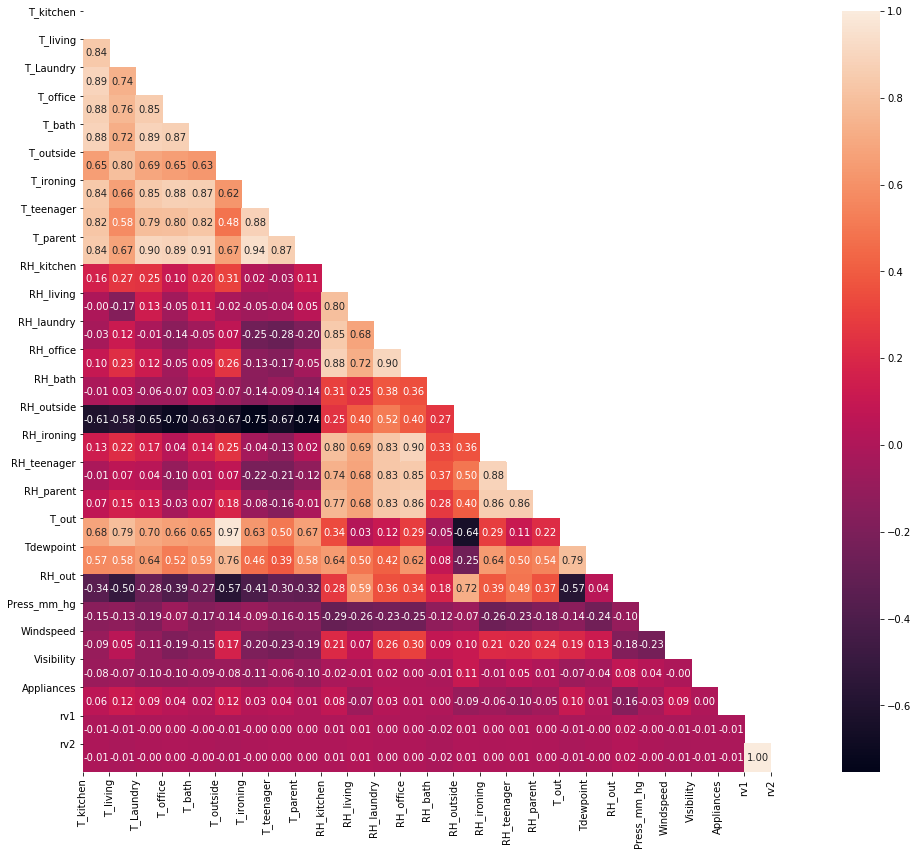

In [133]:
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [134]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
#     print(cols)
#     print(df.shape[1])
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
#             print((cols[i], cols[j]))
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [135]:
train_corr.corr().abs().unstack()

T_kitchen  T_kitchen     1.000000
           T_living      0.835729
           T_Laundry     0.892292
           T_office      0.876682
           T_bath        0.884692
                           ...   
rv2        Windspeed     0.013728
           Visibility    0.010694
           Appliances    0.010645
           rv1           1.000000
           rv2           1.000000
Length: 729, dtype: float64

In [136]:
get_top_abs_correlations(train_corr, 40)

rv1          rv2            1.000000
T_outside    T_out          0.974683
T_ironing    T_parent       0.943921
T_bath       T_parent       0.910009
T_Laundry    T_parent       0.900209
RH_laundry   RH_office      0.899889
RH_office    RH_ironing     0.895120
T_kitchen    T_Laundry      0.892292
T_office     T_parent       0.888264
T_Laundry    T_bath         0.887545
RH_ironing   RH_teenager    0.884849
T_kitchen    T_bath         0.884692
T_ironing    T_teenager     0.881513
RH_kitchen   RH_office      0.880504
T_kitchen    T_office       0.876682
T_office     T_ironing      0.876677
             T_bath         0.871733
T_bath       T_ironing      0.869655
T_teenager   T_parent       0.868251
RH_ironing   RH_parent      0.860155
RH_office    RH_parent      0.858454
RH_teenager  RH_parent      0.857476
T_Laundry    T_office       0.851790
RH_office    RH_teenager    0.848829
T_Laundry    T_ironing      0.846021
RH_kitchen   RH_laundry     0.845592
T_kitchen    T_parent       0.842862
 

#### Observation

Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

나는 T6 안 뺄거임

# Learning in Basic condition

In [145]:
X_train = train[feature_vars.columns]
y_train = train[target_vars.columns]

In [146]:
X_test = test[feature_vars.columns]
y_test = test[target_vars.columns]

In [147]:
X_train.drop(['T_parent', 'rv1', 'rv2', 'Visibility'], axis=1, inplace=True)
X_test.drop(['T_parent', 'rv1', 'rv2', 'Visibility'], axis=1, inplace=True)

/Users/funkywoong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [149]:
X_train.head()

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,RH_kitchen,RH_living,...,RH_bath,RH_outside,RH_ironing,RH_teenager,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,22.60,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,34.70,37.863333,...,71.263333,57.826667,26.890,38.50,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333
19366,23.70,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,40.29,42.900000,...,37.900000,39.890000,35.090,43.40,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000
10816,22.20,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,45.80,44.930000,...,50.026667,33.500000,37.000,43.80,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333
15457,21.29,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,35.79,37.863333,...,59.990000,51.160000,29.700,42.95,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000
2956,21.29,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,47.40,47.290000,...,52.175556,99.900000,51.025,57.50,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667


In [150]:
X_test.head()

,T_kitchen,T_living,T_Laundry,T_office,T_bath,T_outside,T_ironing,T_teenager,RH_kitchen,RH_living,...,RH_bath,RH_outside,RH_ironing,RH_teenager,RH_parent,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
6314,20.600000,19.600000,20.730000,20.290000,18.100000,5.766667,19.405714,20.166667,38.826667,38.663333,...,49.663333,88.433333,33.290000,39.126667,39.712857,6.133333,-1.133333,60.333333,758.200000,2.000000
12257,23.000000,20.963333,25.166667,21.500000,21.566667,10.225000,22.000000,24.100000,42.890000,44.760000,...,73.196667,21.775000,33.950000,37.790000,39.230000,12.016667,5.783333,65.500000,752.433333,4.000000
6271,20.323333,18.033333,21.200000,19.790000,18.390000,-2.000000,19.000000,20.200000,39.500000,41.030000,...,58.230000,81.693333,38.900000,45.700000,44.400000,-1.250000,-1.633333,97.333333,759.966667,1.833333
18179,23.200000,21.390000,24.200000,23.200000,21.700000,9.756000,23.468571,24.790000,38.560000,38.321429,...,41.460000,12.154000,33.595714,39.400000,37.225714,10.550000,6.133333,75.000000,760.600000,1.000000
9661,21.700000,19.533333,21.463333,20.566667,18.500000,6.300000,19.700000,22.700000,37.060000,39.090000,...,45.790000,55.863333,30.166667,37.590000,36.590000,5.733333,3.733333,87.500000,762.200000,4.000000


In [153]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [155]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [156]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

In [163]:
# Run all the proposed models and update the information in a list model_data
model_data = []
for name, curr_model in models:
#     if name == 'Ridge: ':
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train, y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train, curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test, curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test, curr_model.predict(X_test)))
    model_data.append(curr_model_data)

/Users/funkywoong/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/funkywoong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

In [164]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.06164407730102539,
  'Train_R2_Score': 0.13940719683600478,
  'Test_R2_Score': 0.12658928007842363,
  'Test_RMSE_Score': 94.67517218343231},
 {'Name': 'Ridge: ',
  'Train_Time': 0.002180814743041992,
  'Train_R2_Score': 0.14272811638032823,
  'Test_R2_Score': 0.12620688798511193,
  'Test_RMSE_Score': 94.69589500876609},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.01774001121520996,
  'Train_R2_Score': 0.6734547353720168,
  'Test_R2_Score': 0.47792655205743106,
  'Test_RMSE_Score': 73.19689313192879},
 {'Name': 'SVR:',
  'Train_Time': 10.39960503578186,
  'Train_R2_Score': -0.10792120684620343,
  'Test_R2_Score': -0.1121064747854792,
  'Test_RMSE_Score': 106.83167292759468},
 {'Name': 'RandomForest ',
  'Train_Time': 21.220088005065918,
  'Train_R2_Score': 0.9387513231190814,
  'Test_R2_Score': 0.5800520106630327,
  'Test_RMSE_Score': 65.64846831708573},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 5.97186803817749,
  'Train_R2_Score'

In [165]:
result = pd.DataFrame(model_data)

In [166]:
result

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.061644,0.139407,0.126589,94.675172
1,Ridge:,0.002181,0.142728,0.126207,94.695895
2,KNeighborsRegressor:,0.017740,0.673455,0.477927,73.196893
3,SVR:,10.399605,-0.107921,-0.112106,106.831673
4,RandomForest,21.220088,0.938751,0.580052,65.648468
5,ExtraTreeRegressor :,5.971868,1.000000,0.645464,60.319364
6,GradientBoostingClassifier:,5.000558,0.335911,0.250806,87.684747
7,XGBRegressor:,1.037163,0.846960,0.504492,71.310285
8,MLPRegressor:,4.298825,0.085202,0.077128,97.318999


### -> ExtraTreeRegressor 사용할 거임 

### -> Next task
    1. 파라미터 튜닝
    2. feature extraction 